#### Problem 7.3

What size are each of the terms in equation 7.19?

<div style="max-width:700px;">

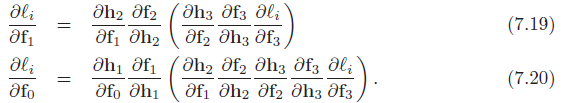

</div>

<div style="max-width:500px;">

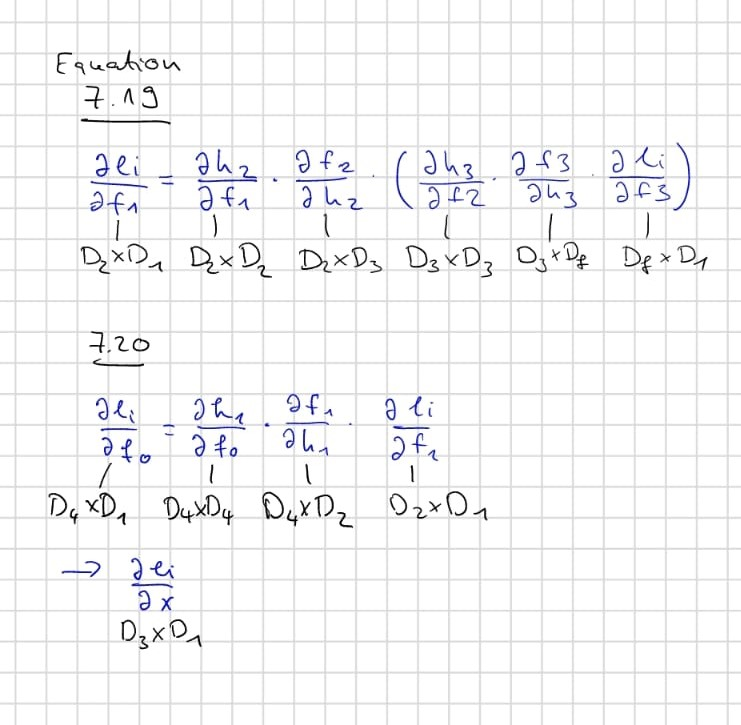

</div>

#### Problem 7.4

Calculate the derivative $∂ℓ_i/∂f[x_i,ϕ]$' for the least squares loss function:

$$ℓ_i = (y_i - f[x_i,ϕ])^2$$


$\frac{∂ℓ_i}{∂f[x_i,ϕ]} = -2 \cdot (y_i - f[x_i,ϕ])$

It is interesting to see that the constant -2 is irrelevant since, this only does not change where the gradient is 0.  

#### Problem 7.5

Calculate the derivative $∂ℓ_i/∂f[x_i,ϕ]$ for the binary classification loss function:  

$$ℓ_i = - (y_i \cdot \log[sig[f[x_i,ϕ]]] + (1 - y_i) \cdot \log[1 - sig[f[x_i,ϕ]]])$$

$$ \begin{aligned}
\frac{∂sig}{∂z} = \frac{exp[-z]}{(1 + exp[-z])^2} = \frac{1}{(1 + exp[-z])} \cdot \frac{exp[-z]}{(1 + exp[-z])} = sig[z] \cdot (1 - sig[z]) \text{ since } \\
\frac{exp[-z]}{(1 + exp[-z])} = \frac{1 + exp[-z]}{1 + exp[-z]} - \frac{1}{1 + exp[-z]} = 1 - \frac{1}{1 + exp[-z]} = 1 - sig[z] \\ \\
\end{aligned}
$$

$$
\begin{aligned}
\frac{∂ℓ_i}{∂f[x_i,ϕ]} &= - \left(\frac{y_i}{sig[f[x_i,ϕ]]} - \frac{1 - y_i}{1 - sig[f[x_i,ϕ]]}\right) \cdot sig[f[x_i,ϕ]] \cdot (1 - sig[f[x_i,ϕ]]) \\
&= \left(-\frac{y_i}{sig[f[x_i,ϕ]]} + \frac{1 - y_i}{1 - sig[f[x_i,ϕ]]}\right) \cdot sig[f[x_i,ϕ]] \cdot (1 - sig[f[x_i,ϕ]]) \\
&= -y_i \cdot (1 - sig[f[x_i,ϕ]]) + (1 - y_i) \cdot sig[f[x_i,ϕ]] \\
&= -y_i + y_i \cdot sig[f[x_i,ϕ]] + sig[f[x_i,ϕ]] - y_i \cdot sig[f[x_i,ϕ]] \\
&= sig[f[x_i,ϕ]] - y_i = \hat{y_i} - y_i
\end{aligned}
$$

#### Problem 7.6

Show that for $z = β + Ω \cdot h$:

$$
\frac{∂z}{∂h}
= Ω^T ,
$$
where $∂z/∂h$ is a matrix containing the term $∂z_i/∂h_j$ in its ith column and j-th row. To do this,  
first find an expression for the constituent elements $∂z_i/∂h_j$ , and then consider the form that
the matrix $∂z/∂h$ must take.

This can be confusing, but its important to understand that $\frac{∂z}{∂h}$ is not given as the normal Jacobian-Matrix,  
which would look something like this.  
  

$$

\begin{pmatrix}
    \frac{∂z_1}{∂h_1} & \frac{∂z_1}{∂h_2} & \cdots & \frac{∂z_1}{∂h_j} \\
    \frac{∂z_2}{∂h_1} & \frac{∂z_2}{∂h_2} & \cdots & \frac{∂z_2}{∂h_j} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{∂z_i}{∂h_1} & \frac{∂z_i}{∂h_2} & \cdots & \frac{∂z_i}{∂h_j} \\
\end{pmatrix}

$$

But since when you have many examples $l_i$ you want $\frac{∂z}{∂h}$ to be in the form  $D_{example}$ x $D_{output}$ and since  
you do a matrix multiplication where you calculate $\frac{∂z}{∂h}$ x grad_output. You need it to be in the form:  

$$

\begin{pmatrix}
    \frac{∂z_1}{∂h_1} & \frac{∂z_2}{∂h_1} & \cdots & \frac{∂z_i}{∂h_1} \\
    \frac{∂z_1}{∂h_2} & \frac{∂z_2}{∂h_2} & \cdots & \frac{∂z_i}{∂h_2} \\
    \vdots & \vdots & \ddots & \vdots \\
    \frac{∂z_1}{∂h_j} & \frac{∂z_2}{∂h_j} & \cdots & \frac{∂z_i}{∂h_j} \\
\end{pmatrix}

$$

But since $z_i = \beta_i + \sum_{j=1}^J w_{ij} \cdot h_j$ and $\frac{∂z_i}{∂h_j} = w_{ij}$, but since the Jacobi Matrix is being  
transposed the weight matrix needs also to be transposed. Normally $\Omega$ is $D_\text{input dim}$ x $D_\text{output dim}$, but here you need,  
$D_\text{output dim}$ x $D_\text{input dim}$, since you do a matrix calculation, $D_{examples}$ x $D_\text{input dim}$, since you want to know, how  
the loss changes if $h_1 \text{ ... } h_j$ changes. This also happens since in the forward pass you need $\Omega$ to be in the normal form but in backprop you need it in the reverse form.  

#### Problem 7.7 
Consider the case where we use the logistic sigmoid (see equation 7.38) as an  
activation function, so $h = sig[f]$. Compute the derivative $∂h/∂f$ for this activation function.  
What happens to the derivative when the input takes (i) a large positive value and (ii) a large    
negative value?

$$\begin{aligned}
\frac{∂h}{∂f} &= \frac{exp[-f]}{(1 + exp[-f])^2} \\
&= \frac{exp[-f] \cdot 1}{exp[-f] \cdot (\frac{1}{exp[-f]} + 2 + exp[-f])} \\
&= \frac{1}{\frac{1}{exp[-f]} + 2 + exp[-f]} \xrightarrow{f \to \infty} 0 \\
&\frac{1}{\frac{1}{exp[-f]} + 2 + exp[-f]} \xrightarrow{f \to -\infty} 0
\end{aligned}
$$

So using the sigmoid function leads to the vanishing gradient problem,  
 since you get a very small gradient if f is very small or very big.

#### Problem 7.8 
Consider using (i) the Heaviside function and (ii) the rectangular function as  
activation functions:

$$
\text{Heaviside}[z] =
\begin{cases}
  0 &  z < 0, \\
  1 &  z \geq 0.
\end{cases}
$$

and

$$
\text{rect}[z] =
\begin{cases}
  0 & z < 0, \\
  1 & 0 \leq z \leq 1, \\
  0 & z > 1.
\end{cases}
$$

Discuss why these functions are problematic for neural network training with gradient-based  
optimization methods.



The problem is that both of these activation functions lead to a constant value as an output. Something like f(x) = c and f'(x) = 0.  
Since there is no gradient, this will lead to a frozen state and no updates.  

#### Problem 7.10

Derive the equations for the backward pass of the backpropagation algorithm for
a network that uses leaky ReLU activations, which are defined as:

$$
a(z) = 
\begin{cases} 
\alpha \cdot z & \text{if } z < 0 \\
z & \text{if } z \ge 0 
\end{cases}
$$

where $\alpha$  is a small positive constant (typically 0.1).




$$
\frac{∂a}{∂z} = 
\begin{cases} 
\alpha & \text{if } z < 0 \\
1 & \text{if } z \ge 0 
\end{cases}
$$

#### Problem 7.11

Consider the training a network with fifty layers, where we only have enough  
memory to store the values at every tenth hidden layer during the forward pass. Explain how  
to compute the derivatives in this situation using gradient checkpointing.  


<div style="max-width:700px;">

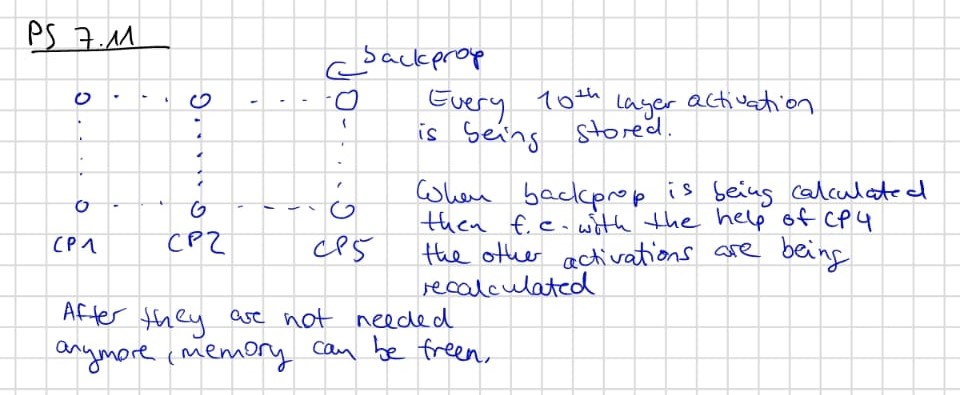

</div>

#### Problem 7.12

This problem explores computing derivatives on general acyclic computational graphs. Consider the function:

$$
y = \exp \left( \exp(x) + \exp(x)^2 \right) + \sin \left( \exp(x) + \exp(x)^2 \right).
$$

We can break this down into a series of intermediate computations so that:

\begin{align*}
f_1 &= \exp(x) \\
f_2 &= f_1^2 \\
f_3 &= f_1 + f_2 \\
f_4 &= \exp(f_3) \\
f_5 &= \sin(f_3) \\
y &= f_4 + f_5.
\end{align*}

The associated computational graph is depicted in figure 7.9 in the book. Compute the derivative $\frac{\partial y}{\partial x}$ by reverse-mode differentiation. In other words, compute in order:

$
\frac{\partial y}{\partial f_5}, \quad \frac{\partial y}{\partial f_4}, \quad \frac{\partial y}{\partial f_3}, \quad \frac{\partial y}{\partial f_2}, \quad \frac{\partial y}{\partial f_1} \quad \text{and} \quad \frac{\partial y}{\partial x},
$

using the chain rule in each case to make use of the derivatives already computed.


$$
\begin{aligned}
\frac{\partial y}{\partial f_4} &= 1  \\
\frac{\partial y}{\partial f_5} &= 1 \\


\frac{\partial y}{\partial f_3} &= \frac{\partial f_4}{\partial f_3} \cdot \frac{\partial y}{\partial f_4} + \frac{\partial f_5}{\partial f_3} \cdot \frac{\partial y}{\partial f_5} \\
&= \exp(f_3) + \cos(f_3) \\

\frac{\partial y}{\partial f_2} &= \exp(f_3) + \cos(f_3) \\
\frac{\partial y}{\partial f_1} &= \frac{\partial f_2}{\partial f_1} \cdot \frac{\partial y}{\partial f_2} + \frac{\partial f_3}{\partial f_1} \cdot \frac{\partial y}{\partial f_3} \\
&= 2\exp(x) \cdot (\exp(f_3) + \cos(f_3)) + \exp(f_3) + \cos(f_3) \\
&= (\exp(f_3) + \cos(f_3)) \cdot (2\exp(x) + 1) \\
\frac{\partial y}{\partial x} &= \frac{\partial f_1}{\partial x} \cdot \frac{\partial y}{\partial f_1} \\
&= \exp(x) \cdot ((\exp(f_3) + \cos(f_3)) \cdot (2\exp(x) + 1))


\end{aligned}
$$




#### Problem 7.13

For the same function in problem 7.12, compute the derivative $\frac{\partial y}{\partial x}$ by \textit{forward-mode differentiation}. In other words, compute in order:

$$
\frac{\partial f_1}{\partial x}, \quad \frac{\partial f_2}{\partial x}, \quad \frac{\partial f_3}{\partial x}, \quad \frac{\partial f_4}{\partial x}, \quad \frac{\partial f_5}{\partial x}, \quad \text{and} \quad \frac{\partial y}{\partial x},
$$

using the chain rule in each case to make use of the derivatives already computed. Why do we not use forward-mode differentiation when we calculate the parameter gradients for deep networks?



$$
\begin{aligned}
\frac{\partial f_1}{\partial x} &= \exp(x) \\
\frac{\partial f_2}{\partial x} &= 2 \exp(x) _ \\
\end{aligned}
$$

#### Problem 7.14


#### Problem 7.15

What would you expect to happen if we initialized all of the weights and biases  
in the network to zero?  

This depends on the architecture. Lets take this as an example:
The forward pass would be all 0 for the first batch.

<div style="max-width:700px;">

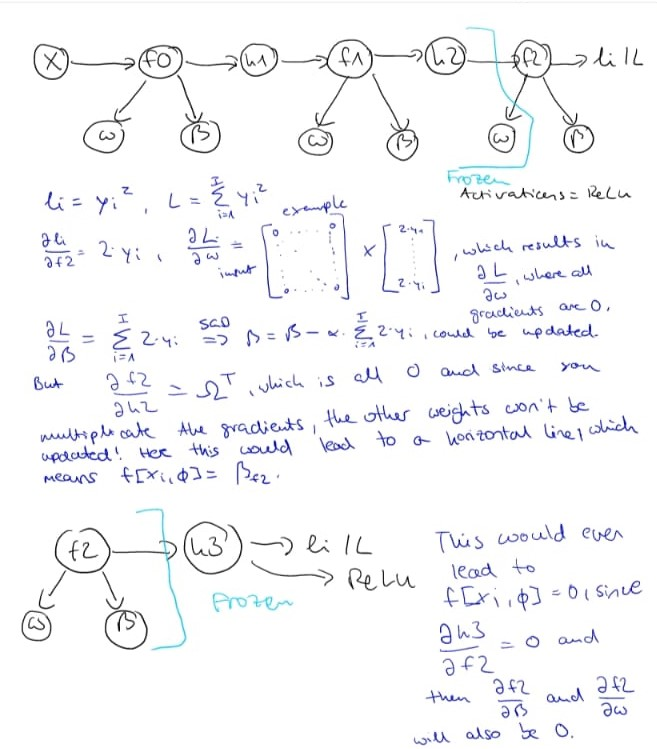
    
</div>

This follows for all activation units. So to sum it up setting all weights and biases to 0, leads  
to either $f[x_i,\phi] = c$, or $f[x_i,\phi] = 0$, which is of course not desired. Also if you set all  
weights and biases to the same constant like 1 for example, this then will lead to the fact that all hidden units  
inside a layer will have the same gradient and therefore learn the same representation. This then will lead to the fact that   
maximally 1 LR per Layer will be created, so that the representation in the end might not be that good and the model could underfit.  